### Use-case: Perform Customer Segmentation based on Annual Income and the Spending Score

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('Mall_Customers.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


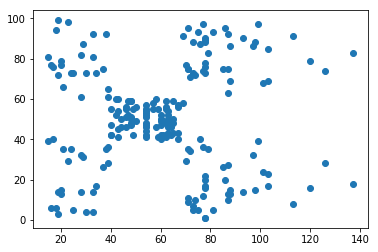

In [5]:
plt.scatter(data['Annual Income (k$)'] , data['Spending Score (1-100)'])

In [6]:
features = data.iloc[:,[3,4]].values

In [7]:
#Apply Kmeans
#Assuming K=5 using scatter plot reference

from sklearn.cluster import KMeans
model = KMeans(n_clusters= 5)
model.fit(features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [8]:
result = model.predict(features)

In [22]:
model.inertia_

44448.45544793371

In [9]:
result

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 4,
       3, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 0, 2, 4, 2, 0, 2, 0, 2,
       4, 2, 0, 2, 0, 2, 0, 2, 0, 2, 4, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [16]:
dataSetFinal = pd.DataFrame(np.append(features,result.reshape(-1,1) , axis= 1) , 
                            columns=['Annual Income (k$)','Spending Score (1-100)', 'label'])

<function matplotlib.pyplot.show>

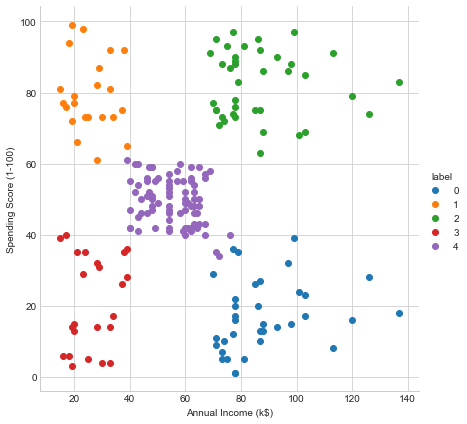

In [21]:
import seaborn as sns
sns.set_style("whitegrid")
sns.FacetGrid(dataSetFinal , hue="label", size=6).map(plt.scatter,"Annual Income (k$)","Spending Score (1-100)").add_legend()
plt.show

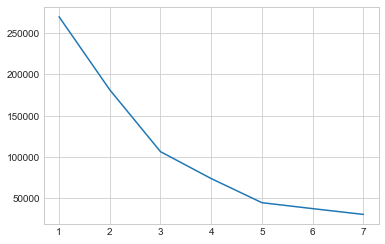

In [24]:
#Technique to figure out the ideal k-value using Elbow method
#Check errors for each K-value and ensure we go for that k-value which has less error.
#KMeans ----> WCSS(Within Cluster Sum of Squares)

from sklearn.cluster import KMeans
#Create model for each K value from 1 to 10
wcss=[]
for i in range(1,8):
    model1 = KMeans(n_clusters=i)
    model1.fit(features)
    wcss.append(model1.inertia_)

plt.plot(range(1,8), wcss)